# Foundations of Data Science Project - Diabetes Analysis

---------------
## Context
---------------

Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe. In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima tribe. 

-----------------
## Objective
-----------------

Here, we are analyzing different aspects of Diabetes in the Pima Diabetes Analysis by doing Exploratory Data Analysis.

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: A function that scores the likelihood of diabetes based on family history.
* Age: Age in years
* Outcome: Class variable (0: a person is not diabetic or 1: a person is diabetic)

### Importing the necessary libraries

In [1]:
# import all the necessary libraries

import numpy as np  # library used for numerical calculation and working with arrays
import pandas as pd  # library used for manipulating, cleaning, analyzing and creating data within certain structures such as Series and DataFrames

import seaborn as sns  # library for plots and visualizations
import matplotlib.pyplot as plt  # library for plots and visualizations
%matplotlib inline

### Reading the given dataset

In [3]:
pima = pd.read_csv("diabetes.csv")

### Showing the last 10 records of the dataset

In [3]:
pima.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,20,79,37.5,0.197,26,0
759,6,190,92,20,79,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,79,44.0,0.403,43,1
762,9,89,62,20,79,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,79,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,79,30.1,0.349,47,1
767,1,93,70,31,79,30.4,0.315,23,0


There are 9 columns.

### Showing the first 10 records of the dataset 

In [5]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


### Finding the dimension of the `pima` dataframe. 

In [39]:
pima.shape

(768, 9)

Dimension of a dataset refers to its size, how many rows and columns there are. For this dataset, there are 768 rows and 9 columns

### Finding the size of the `pima` dataframe. 

In [7]:
pima.size

6912

Size means the number of elements in the dataframe. As there are 768 and 9 columns (as seen before), it is simply 768*9 = 6912.

### What are the data types of all the variables in the data set? 

In [9]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Are there any missing values in the `pima` dataframe? 

In [15]:
pima.isnull().values.any()

False

There are no missing values in pima dataset.

### Finding the summary statistics for all variables except 'Outcome' in the `pima` data.

In [16]:
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


For the `Age` Variable:

- count: 768 - There are 768 non-null rows for this variable
- min: The youngest person in this dataset is 21 years old. The lowest age for this dataset is 21.
- max: The oldest person in this dataset is 81 years old. The highest age for this dataset is 81.
- mean: 33.240885 - It is the average value for this column. On average, the people on the dataset are 33.24 years old.
- std: 11.760232 - It represents the standard deviation value for this variable. The closer the standard deviation is to 0, the more homogeneous the data.
- 25%: 25th percentile or first quartile. Quartiles are an easy way to understand how data is distributed. In this case, the first quartile means that a quarter of people are below or 
equal 24 years old.
- 50%: 50th percentile, second quartile or median. It is the middle value for this column; also means that half of the values for this column are below or equal 29 years old.
- 75%: 75th percentile or third quartile. It means that 75% of the values for this column are below or equal 41 years old.
- It worth noting that these statistics show that even though there are old people, there are many more younger ones. It is not an even distribution.

### Plotting the distribution for the variable 'BloodPressure'.

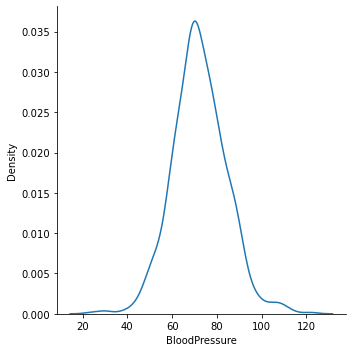

In [18]:
sns.displot(pima['BloodPressure'], kind='kde')
plt.show()

- The Blood Pressure is distributed around a wide range, from 20 to 120. The distribution seems symmetrical.
- The majority of values, half of the entire disdtribution for this variable (IQR), are around the 60-80 range.
- There are some values around 40-60 and 80-100.
- There are some rare variables, less probable in the ranges <40 and >100.

### What is the 'BMI' of the person having the highest 'Glucose'? 

In [19]:
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

BMI = 42.9

### What is the mean of the variable 'BMI'? 
### What is the median of the variable 'BMI'? 
### What is the mode of the variable 'BMI'?
### Are the three measures of central tendency equal?

In [20]:
m1 = pima['BMI'].mean()  # mean
print(m1)
m2 = pima['BMI'].median()  # median
print(m2)
m3 = pima['BMI'].mode()[0]  # mode
print(m3)

32.45080515543619
32.0
32.0


- Mean = 32.45080515543619
- Median = 32.0
- Mode = 32.0
- No, these three measures are not of central tendency equal. The mean slightly higher than the median and mode. As we can see in the picture below, it gives us a slightly right skewed distribution.

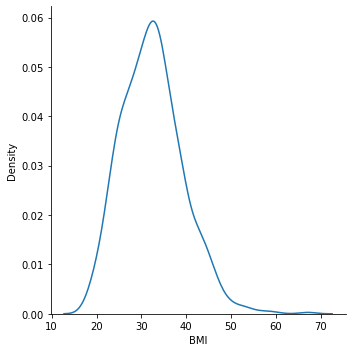

In [21]:
sns.displot(pima['BMI'], kind='kde')

### How many women's 'Glucose' levels are above the mean level of 'Glucose'? 

In [22]:
pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]

343

- There are 343 women's 'Glucose' levels above the mean.

### How many women have their 'BloodPressure' equal to the median of 'BloodPressure' and their 'BMI' less than the median of 'BMI'? 

In [27]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
14,5,166,72,19,175,25.8,0.587,51,1
93,4,134,72,20,79,23.8,0.277,60,1
103,1,81,72,18,40,26.6,0.283,24,0
205,5,111,72,28,79,23.9,0.407,27,0
299,8,112,72,20,79,23.6,0.840,58,0
325,1,157,72,21,168,25.6,0.123,24,0
330,8,118,72,19,79,23.1,1.476,46,0
366,6,124,72,20,79,27.6,0.368,29,1
380,1,107,72,30,82,30.8,0.821,24,0
393,4,116,72,12,87,22.1,0.463,37,0


In [41]:
pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())].count()[['Outcome']]

Outcome    22
dtype: int64

- There are 22 women whose 'BloodPressure' are equal to the median of 'BloodPressure' and 'BMI' are less than the median of 'BMI'.

### Creating a pairplot for the variables 'Glucose', 'SkinThickness', and 'DiabetesPedigreeFunction'.

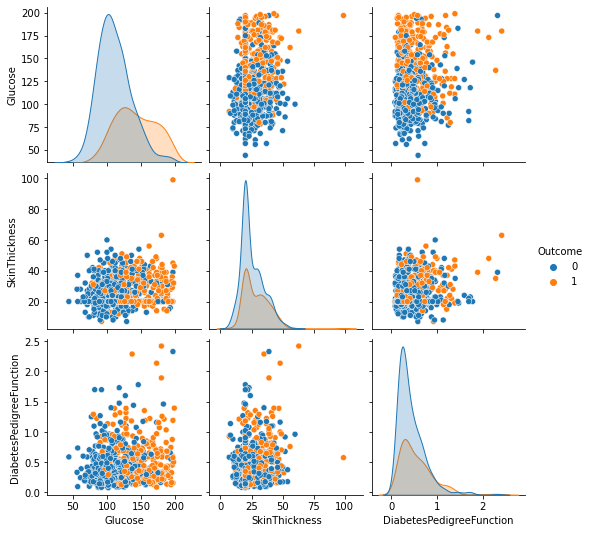

In [29]:
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue='Outcome')
plt.show()

#### Write your Answer here: 


- The higher the Glucose, the higher the chances that a diabetic woman has Thicker Skin and higher Diabetes Pedigree Function.
- In addition, it appears that the higher the Skin Thickness for a diabetic woman, higher the Diabetes Pedigree Function. However, it also seems that there is no sufficient data in order to confirm that hypothesis.

### Plotting the scatterplot between 'Glucose' and 'Insulin'.

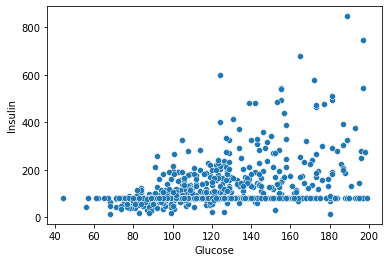

In [30]:
sns.scatterplot(x='Glucose',y='Insulin',data=pima)
plt.show()

- We would expect that the higher the 'Glucose', the higher the 'Insulin'. However, there is no clear tendency in this scatterplot.
- There are some points that confirm that hipothesis, but they are not that many in order to present a tendency. The majority of data is distributed in a low insulin value for both low and high Glucose.

### Plotting the boxplot for the 'Age' variable. Are there outliers? 

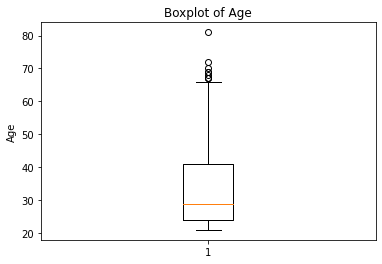

In [32]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

- Yes, there are some outliers on the top, regarding the older ages. From this chart, ages above a certain number are considered outliers, In this case, around 65 years old.

### Plotting histograms for the 'Age' variable to understand the number of women in different age groups given whether they have diabetes or not.

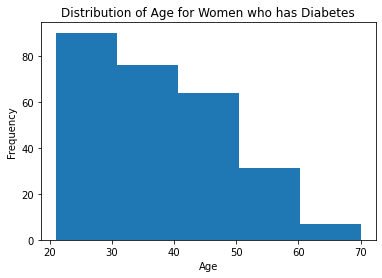

In [33]:
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

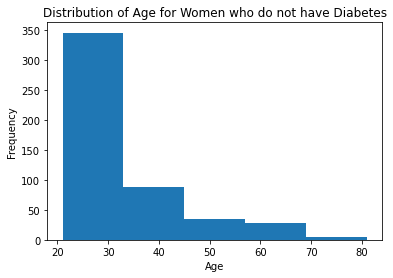

In [5]:
plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- Most women who have diabetes are in their 20's, followed by the ones in their 30's, 40's and so on. We observe much less older women having diabetes, but this might be expected and due to the fact that there are much more young women and old ones in this dataset (as seen in Q9).
- When we observe women who do not have diabetes, the majority of them are in their 20's, but this value drops considerably for the other age ranges. Also due to the data distribution.
- When comparing women who have and do not have diabetes in an age range different from 20, they appear to be very close and descending. Both graphs show the same general tendency.

### What is the Interquartile Range of all the variables?

In [35]:
Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness               12.0000
Insulin                     48.2500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


- The same IQR can be seen in various types of plots, like the Boxplot.

The interquartile is used to understand the spread of central data in a distribution. We conclude that 50% of the elements in the middle of the sample are contained in interquartile range. Thus, the rest of the data is distributed towards the extremes.

### Finding and visualizing the correlation matrix. 

In [36]:
corr_matrix = pima.iloc[:,0:8].corr()

corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.128022,0.208987,0.009393,-0.018780,0.021546,-0.033523,0.544341
Glucose,0.128022,1.000000,0.219765,0.158060,0.396137,0.231464,0.137158,0.266673
BloodPressure,0.208987,0.219765,1.000000,0.130403,0.010492,0.281222,0.000471,0.326791
SkinThickness,0.009393,0.158060,0.130403,1.000000,0.245410,0.532552,0.157196,0.020582
Insulin,-0.018780,0.396137,0.010492,0.245410,1.000000,0.189919,0.158243,0.037676
BMI,0.021546,0.231464,0.281222,0.532552,0.189919,1.000000,0.153508,0.025748
DiabetesPedigreeFunction,-0.033523,0.137158,0.000471,0.157196,0.158243,0.153508,1.000000,0.033561
Age,0.544341,0.266673,0.326791,0.020582,0.037676,0.025748,0.033561,1.000000


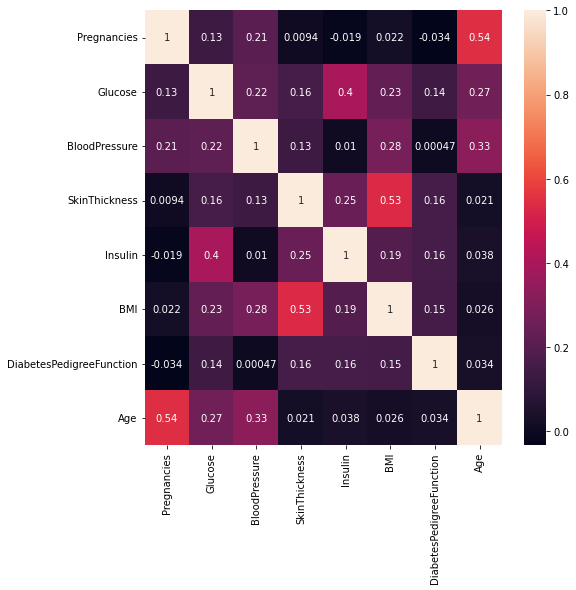

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

- From the correlation matrix we can see that there is no strong correlation, neither positive nor negative.
- 'BMI' and 'SkinThickness', as well as 'Age' and 'Pregnancies' have moderate positive correlation. Generally, the higher the BMI, the thicker the skin is because of the fat. Also, usually the older the person is, more pregnancies they have experienced.
- 'Age' and 'BloodPressure' have weak positive correlation. Usually the older the person, higher the risks of high blood pressure, but it is not a rule.
- The other variables have very weak or none correlation.